# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from lightgbm import LGBMClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner, util

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### LightGBM

In [3]:
lgbm_model = LGBMClassifier(
    objective='binary',
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

In [4]:
param_distributions_lgbm = {
    'num_leaves': [20, 31, 40, 50, 60, 70],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [-1, 5, 10, 15, 20],
    'min_child_samples': [10, 20, 30, 40, 50],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.05, 0.1],
    'reg_lambda': [0, 0.01, 0.05, 0.1],
}

In [5]:
result, model, cv, loss, all_cv = runner.search_paramsv2(
    lgbm_model,param_distributions_lgbm, 'lgbm',
    [X_train, Y_train, X_val, Y_val, X_test, Y_test], n_iter=100)

df=pd.DataFrame((result.values()))
df

Realizando a Busca de Parâmetros por 20 iterações:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 8157, number of negative: 11364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 19521, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417858 -> initscore=-0.331574
[LightGBM] [Info] Start training from score -0.331574
[LightGBM] [Info] Number of positive: 8157, number of negative: 11364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 19521, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417858 -> initscore=-0.331574
[LightGBM] [Info] Start training from score -0.331574
[LightGBM] [Info

,params,score,model_time,accuracy_train,accuracy_val,accuracy_test,f1_score,recall,auc,fpr,tpr,model_path
0,"{'subsample': 0.6, 'reg_lambda': 0.01, 'reg_al...",0.971351,0.256033,0.975155,0.913698,0.923518,0.905771,0.900996,0.920018,"[0.0, 0.060960839725474364, 1.0]","[0.0, 0.90099589923843, 1.0]",./models/lgbm/0.pkl
1,"{'subsample': 0.7, 'reg_lambda': 0.01, 'reg_al...",0.971741,0.326174,0.978536,0.916089,0.924235,0.906462,0.899824,0.920441,"[0.0, 0.05894226887363747, 1.0]","[0.0, 0.8998242530755711, 1.0]",./models/lgbm/1.pkl
2,"{'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alp...",0.968901,0.242476,0.963731,0.909395,0.917304,0.898712,0.899238,0.914496,"[0.0, 0.0702462656439241, 1.0]","[0.0, 0.8992384299941417, 1.0]",./models/lgbm/2.pkl
3,"{'subsample': 1.0, 'reg_lambda': 0.01, 'reg_al...",0.967517,0.371212,0.957226,0.906048,0.916348,0.897421,0.896895,0.913324,"[0.0, 0.0702462656439241, 1.0]","[0.0, 0.8968951376684241, 1.0]",./models/lgbm/3.pkl
4,"{'subsample': 0.9, 'reg_lambda': 0.05, 'reg_al...",0.970140,0.412281,0.962707,0.909395,0.914914,0.895232,0.891037,0.911203,"[0.0, 0.06863140896245458, 1.0]","[0.0, 0.8910369068541301, 1.0]",./models/lgbm/4.pkl
5,"{'subsample': 0.8, 'reg_lambda': 0.05, 'reg_al...",0.970894,0.308258,0.971313,0.912025,0.917304,0.898055,0.892794,0.913494,"[0.0, 0.06580540976988292, 1.0]","[0.0, 0.8927943760984183, 1.0]",./models/lgbm/5.pkl
6,"{'subsample': 1.0, 'reg_lambda': 0.05, 'reg_al...",0.964675,0.259082,0.942831,0.897920,0.910134,0.889801,0.889279,0.906892,"[0.0, 0.07549454985870004, 1.0]","[0.0, 0.8892794376098418, 1.0]",./models/lgbm/6.pkl
7,"{'subsample': 0.6, 'reg_lambda': 0.01, 'reg_al...",0.975571,0.442178,0.994929,0.923739,0.929254,0.912736,0.906854,0.925773,"[0.0, 0.055308841340331046, 1.0]","[0.0, 0.9068541300527241, 1.0]",./models/lgbm/7.pkl
8,"{'subsample': 1.0, 'reg_lambda': 0.05, 'reg_al...",0.974092,0.375662,0.986271,0.919197,0.926386,0.909145,0.902753,0.922713,"[0.0, 0.05732741219216794, 1.0]","[0.0, 0.9027533684827183, 1.0]",./models/lgbm/8.pkl
9,"{'subsample': 0.7, 'reg_lambda': 0.05, 'reg_al...",0.959496,0.289487,0.934481,0.894573,0.899618,0.875813,0.867604,0.894642,"[0.0, 0.0783205490512717, 1.0]","[0.0, 0.8676039835969537, 1.0]",./models/lgbm/9.pkl


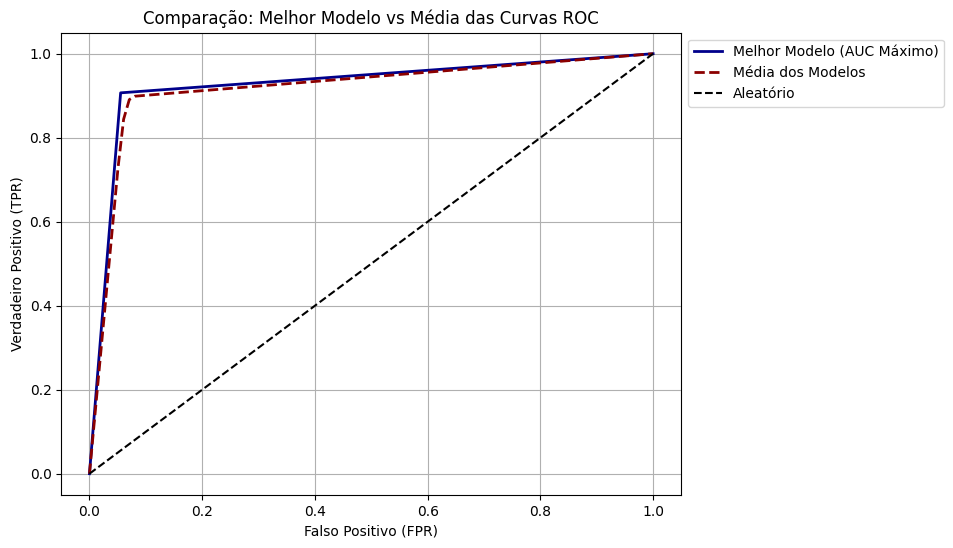

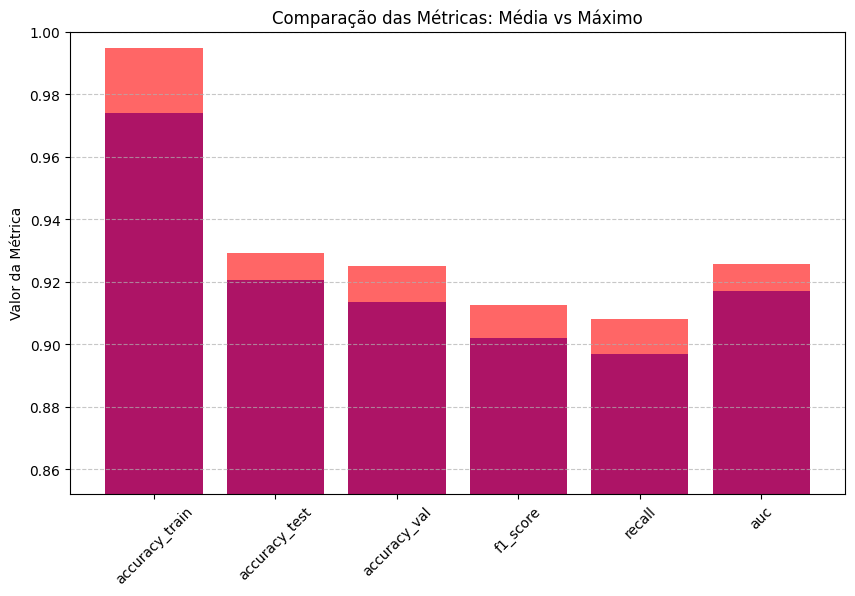

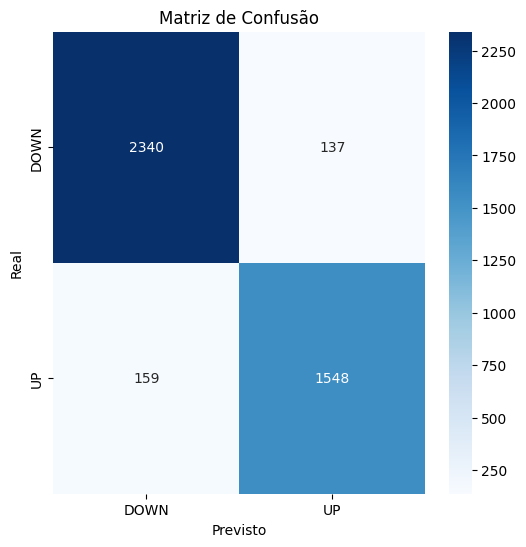

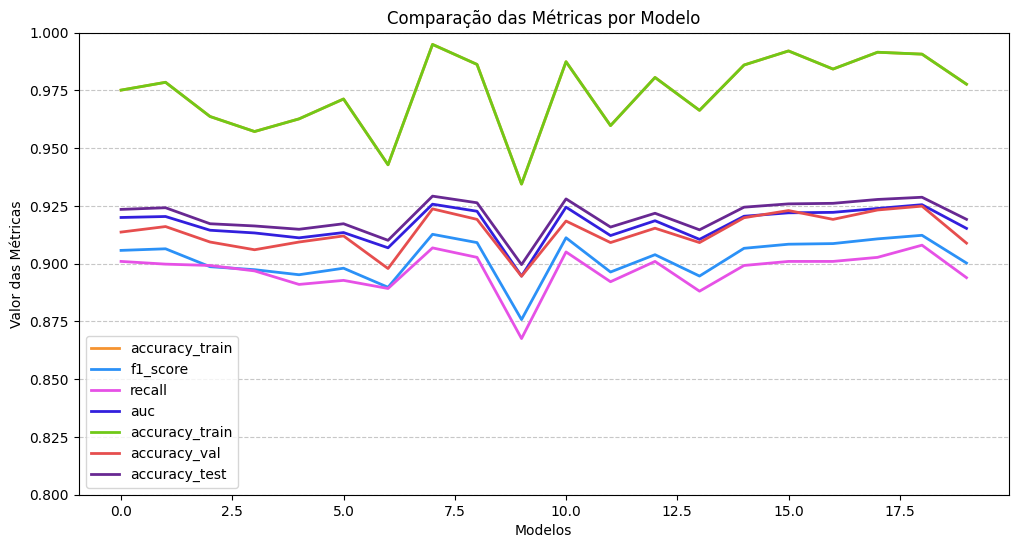

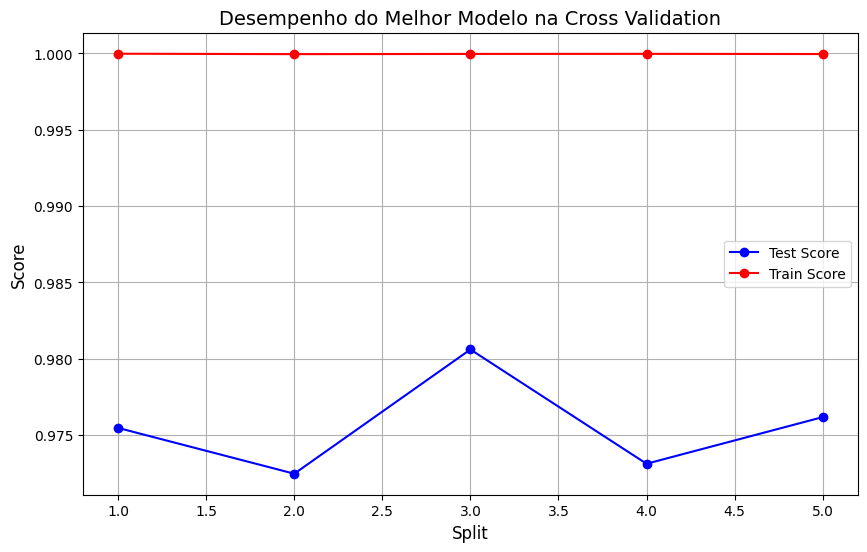

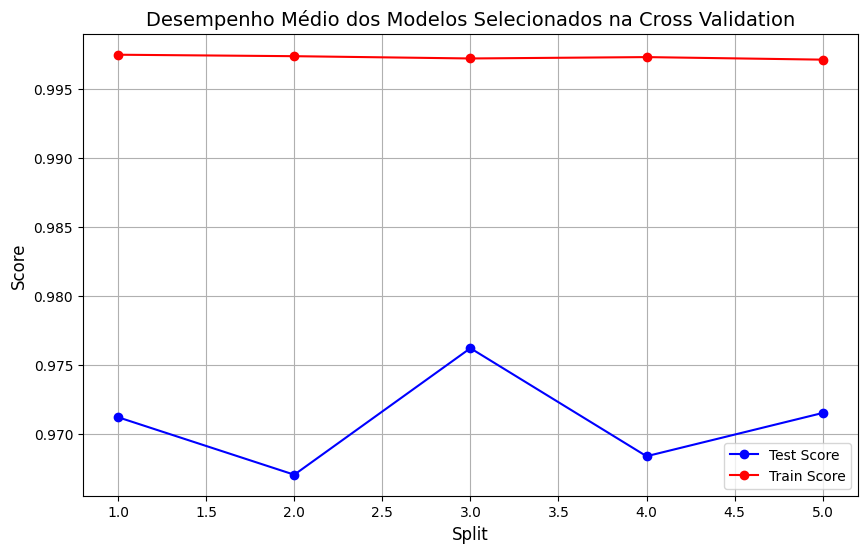

### Resultados do Modelo

**Melhores Parâmetros:**
```
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.9, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 15, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 250, 'n_jobs': -1, 'num_leaves': 70, 'objective': 'binary', 'random_state': 51, 'reg_alpha': 0.1, 'reg_lambda': 0.01, 'subsample': 0.6, 'subsample_for_bin': 200000, 'subsample_freq': 0}
```

#### Resultados das Métricas:
- **Accuracy train**:
  - **Melhor valor geral**: 0.9949
  - **Média**: 0.9742
  - **Desvio Padrão**: 0.0163
  - **Valor no Modelo Selecionado**: 0.9949

- **Accuracy val**:
  - **Melhor valor geral**: 0.9249
  - **Média**: 0.9137
  - **Desvio Padrão**: 0.0081
  - **Valor no Modelo Selecionado**: 0.9237

- **Accuracy test**:
  - **Melhor valor geral**: 0.9293
  - **Média**: 0.9206
  - **Desvio Padrão**: 0.0073
  - **Valor no Modelo Selecionado**: 0.9293

- **F1 score**:
  - **Melhor valor geral**: 0.9127
  - **Média**: 0.9021
  - **Desvio Padrão**: 0.0089
  - **Valor no Modelo Selecionado**: 0.9127

- **Auc**:
  - **Melhor valor geral**: 0.9258
  - **Média**: 0.9169
  - **Desvio Padrão**: 0.0075
  - **Valor no Modelo Selecionado**: 0.9258

- **Recall**:
  - **Melhor valor geral**: 0.9080
  - **Média**: 0.8970
  - **Desvio Padrão**: 0.0087
  - **Valor no Modelo Selecionado**: 0.9069



In [6]:
from IPython.display import display, Markdown

plots.show_best_roc(df)
plots.show_bar_metrics2(df)
plots.show_confusion_matrix(model, X_test, Y_test)
plots.show_metrics_comparison_line_plot(df)
plots.plot_cv_performance(cv, "Desempenho do Melhor Modelo na Cross Validation")
plots.plot_cv_performance(all_cv, "Desempenho Médio dos Modelos Selecionados na Cross Validation")
display(Markdown(util.generate_markdown_report(model, result.values())))